## PART 1

In [456]:
import networkx as nx
from collections import deque

In [457]:
with open('input.txt') as f:
    M = list(map(lambda x: list(x.strip()), f.readlines()))

for row in M: 
    for el in row: 
        assert el in ['#', '.', '>', 'v']
        #print(el, end=' ')
    #print()

assert len(M) == len(M[0])  # matrice quadrata
n = len(M)

nella matrice non ci sono i simboli < e ^

se sono in (i,j) e M[i][j] == '.' allora vale sempre j-1 >= 0

se sono in (i,j) e M[i][j] == '.' allora vale sempre i+1 < n, tranne che per il punto di arrivo

se sono in (i,j) e M[i][j] == '.' allora vale sempre i-1 >= 0, tranne che per il punto di partenza

In [458]:
DAG = nx.DiGraph()

Q = deque()
Q.append(tuple([tuple([0,1]),tuple([1,1])]))

while Q:

    source, dest = Q.popleft()
    DAG.add_edge(source, dest)
    
    i,j = dest

    if M[i-1][j] not in ['#', 'v']:
        t = tuple([i-1,j])
        if t != source: Q.append(tuple([dest,t]))

    if i+1 < n and M[i+1][j] != '#':
        t = tuple([i+1,j])
        if t != source: Q.append(tuple([dest,t]))

    if M[i][j-1] not in ['#', '>']:
        t = tuple([i,j-1])
        if t != source: Q.append(tuple([dest,t]))

    if j+1 < n and M[i][j+1] != '#':
        t = tuple([i,j+1])
        if t != source: Q.append(tuple([dest,t]))

# nx.draw(G)

In [459]:
assert nx.is_directed_acyclic_graph(DAG)

max([len(p)-1 for p in nx.all_simple_paths(DAG, source=tuple([0,1]), target=tuple([n-1,n-2]))])

2182

## PART 2

il problema è np-hard, la mia soluzione è un brute-force su un nuovo grafo che creo 

il grafo che creo è una compressione del grafo originale, sequenze di archi di grado 2 vengono sostituite con un solo arco

nell'immagine sotto, che è l'input di test, gli archi che formano ogni path colorato diventano un solo arco che pesa come la distanza fra i due estremi dell'arco

<div>
<img src="test_input.png" width="350"/>
</div>

In [460]:
G = nx.Graph()

Q = deque()
Q.append(tuple([tuple([0,1]),tuple([1,1])]))

while Q:

    source, dest = Q.popleft()
    if G.has_edge(source,dest): 
        continue
    G.add_edge(source, dest, weight=1)
    
    i,j = dest

    if M[i-1][j] != '#':
        t = tuple([i-1,j])
        if t != source: Q.append(tuple([dest,t]))

    if i+1 < n and M[i+1][j] != '#':
        t = tuple([i+1,j])
        if t != source: Q.append(tuple([dest,t]))

    if M[i][j-1] != '#':
        t = tuple([i,j-1])
        if t != source: Q.append(tuple([dest,t]))

    if j+1 < n and M[i][j+1] != '#':
        t = tuple([i,j+1])
        if t != source: Q.append(tuple([dest,t]))

#nx.draw(G, pos=nx.spring_layout(G))

junctions sono i nodi del nuovo grafo compresso

In [461]:
junctions = [n for n in G.nodes if G.degree[n] > 2] + [tuple([0,1]), tuple([n-1,n-2])]

In [462]:
compressed_G = nx.Graph()

for n in junctions:
    for x in G.neighbors(n):

        S = set([n,x])
        cur = x

        while len(list(G.neighbors(cur))) == 2 and cur not in junctions:

            neighbor1, neighbor2 = list(G.neighbors(cur))
            if neighbor1 in S:
                S.add(neighbor2)
                cur = neighbor2
            else:
                S.add(neighbor1)
                cur = neighbor1
        
        if not compressed_G.has_edge(cur, n):
            compressed_G.add_edge(n, cur, weight=len(S)-1)

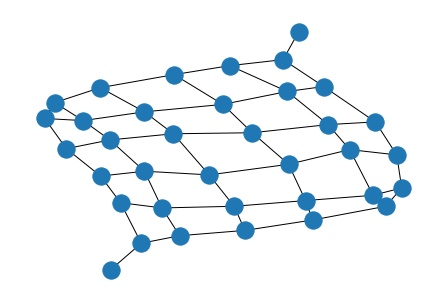

In [454]:
nx.draw(compressed_G, pos=nx.spring_layout(compressed_G))

In [455]:
# ci mette circa 1 min
max(
    nx.path_weight(compressed_G, p, 'weight')
    for p in nx.all_simple_paths(compressed_G, source=tuple([0,1]), target=tuple([len(M)-1,len(M)-2]))
)

6670